<a href="https://colab.research.google.com/github/tar7nic/ItML/blob/main/Assignment/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [3]:
import io

# Load the uploaded dataset
df = pd.read_csv(io.BytesIO(uploaded['spam.csv']), encoding='latin-1')

# Drop unnecessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Display the first few rows
print("Dataset Preview:")
print(df.head())

Dataset Preview:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
# Encode labels: 'ham' -> 0, 'spam' -> 1
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split into training and testing sets
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("\nShapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")



Shapes:
X_train: (4457,), y_train: (4457,)
X_test: (1115,), y_test: (1115,)


In [5]:
# Convert text to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# Display the shape of the TF-IDF features
print("\nTF-IDF Features Shape:")
print(f"X_train_tfidf: {X_train_tfidf.shape}")
print(f"X_test_tfidf: {X_test_tfidf.shape}")



TF-IDF Features Shape:
X_train_tfidf: (4457, 5000)
X_test_tfidf: (1115, 5000)


In [6]:
# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,449 (2.47 MB)

 Trainable params: 648,449 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_tfidf, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8290 - loss: 0.5088 - val_accuracy: 0.8655 - val_loss: 0.1799
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9367 - loss: 0.1295 - val_accuracy: 0.9787 - val_loss: 0.0639
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9953 - loss: 0.0272 - val_accuracy: 0.9843 - val_loss: 0.0540
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9944 - loss: 0.0181 - val_accuracy: 0.9809 - val_loss: 0.0597
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9980 - loss: 0.0091 - val_accuracy: 0.9821 - val_loss: 0.0597
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 0.0040 - val_accuracy: 0.9809 - val_loss: 0.0719


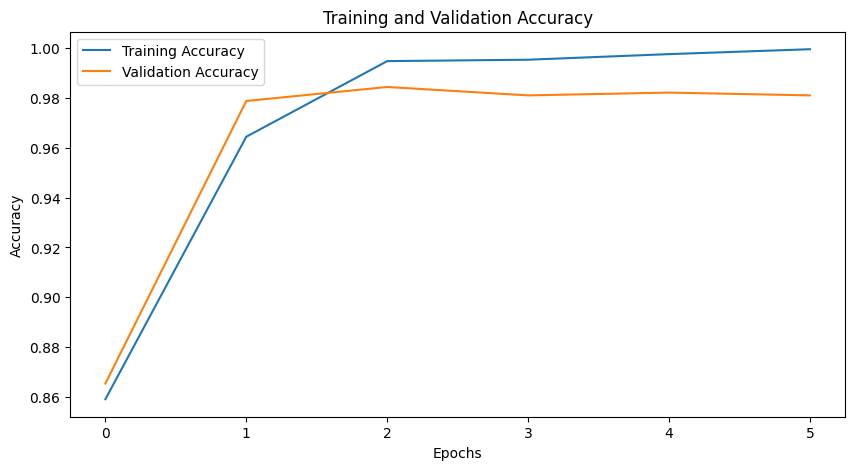

In [8]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [9]:
# Evaluate on test data
y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

Test Accuracy: 97.85%

Confusion Matrix:
[[955  10]
 [ 14 136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.91      0.92       150

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [10]:
# Example prediction
sample_message = ["WINNER!! You have won a $1000 prize! Call now to claim."]
sample_tfidf = tfidf_vectorizer.transform(sample_message).toarray()
prediction = model.predict(sample_tfidf)
print("\nExample Prediction:")
print("Spam" if prediction > 0.5 else "Not Spam")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step

Example Prediction:
Spam


In [11]:
# Example prediction
sample_message = ["I will call you back later."]
sample_tfidf = tfidf_vectorizer.transform(sample_message).toarray()
prediction = model.predict(sample_tfidf)
print("\nExample Prediction:")
print("Spam" if prediction > 0.5 else "Not Spam")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Example Prediction:
Not Spam


In [12]:
# Save the model
model.save('my_model.keras')
print("\nModel saved as 'my_model.keras'")


Model saved as 'my_model.keras'


Enter the SMS message to check: WINNER!! You have won a $1000 prize! Call now to claim.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


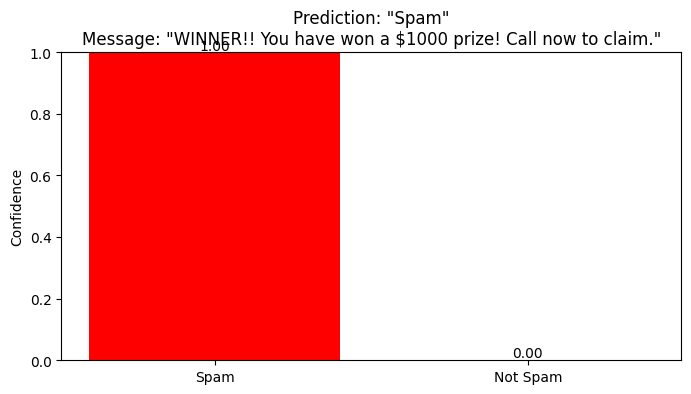

In [16]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pickle

# Load the saved model
model = load_model('my_model.keras')

# Load or fit the TF-IDF vectorizer
# If you have saved the fitted vectorizer, load it using pickle
try:
    with open('tfidf_vectorizer.pkl', 'rb') as file:
        tfidf_vectorizer = pickle.load(file)
except FileNotFoundError:
    # If the vectorizer is not saved, you need to fit it again using the training data
    # Assuming you have access to the training data (X_train)
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    tfidf_vectorizer.fit(X_train)  # Replace X_train with your training data
    with open('tfidf_vectorizer.pkl', 'wb') as file:
        pickle.dump(tfidf_vectorizer, file)

def predict_sms(message, model, vectorizer):
    """Predict whether an SMS is spam or not and return the confidence."""
    # Transform the input message using the TF-IDF vectorizer
    message_tfidf = vectorizer.transform([message]).toarray()

    # Make prediction
    prediction = model.predict(message_tfidf)
    confidence = prediction[0][0]
    spam_probability = float(confidence)
    ham_probability = 1 - spam_probability

    # Determine the result
    result = "Spam" if spam_probability > 0.5 else "Not Spam"

    return result, spam_probability, ham_probability

def visualize_prediction(message, result, spam_confidence, ham_confidence):
    """Visualize the prediction result and confidence."""
    labels = ['Spam', 'Not Spam']
    probabilities = [spam_confidence, ham_confidence]

    plt.figure(figsize=(8, 4))
    bars = plt.bar(labels, probabilities, color=['red', 'green'])
    plt.ylim(0, 1)
    plt.ylabel('Confidence')
    plt.title(f'Prediction: "{result}"\nMessage: "{message}"')

    # Add confidence values on top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height:.2f}', ha='center', va='bottom')

    plt.show()

# Example usage
sample_message = input("Enter the SMS message to check: ")
result, spam_confidence, ham_confidence = predict_sms(sample_message, model, tfidf_vectorizer)
visualize_prediction(sample_message, result, spam_confidence, ham_confidence)


Enter the SMS message to check: Hello. How are you?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


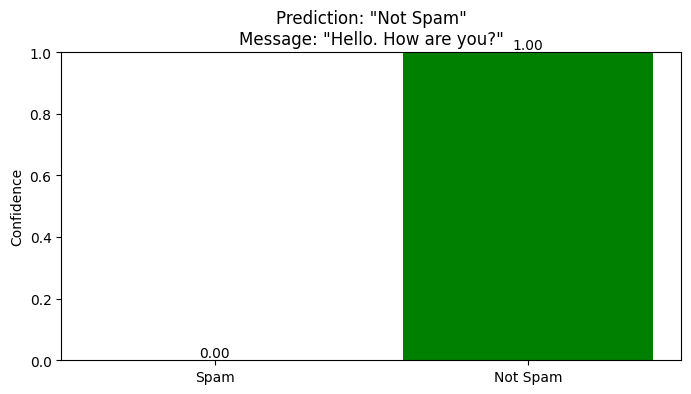

In [17]:
sample_message = input("Enter the SMS message to check: ")
result, spam_confidence, ham_confidence = predict_sms(sample_message, model, tfidf_vectorizer)
visualize_prediction(sample_message, result, spam_confidence, ham_confidence)
